<a href="https://colab.research.google.com/github/mattmason36/pyTorch-testing/blob/main/simple_neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IRIS Dataset
https://archive.ics.uci.edu/dataset/53/iris

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
# Create Model class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden layer1 (number of neurons)  -->
  # H2 (n)  -->
  # output(3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [7]:
# Pick a manual seed for randomisation
torch.manual_seed(41)
#Create an instance of model
model = Model()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
url ='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [10]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [11]:
# Changed the last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

/tmp/ipython-input-825776056.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [12]:
# TRain test and split!  Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [13]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [16]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [17]:
# Convert y labes to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [18]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesnt go down after a bunch of interations(epochs), lower our lerning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [19]:
# Train our model
# Epochs (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # get predicted results
  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print (f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'Epochs')

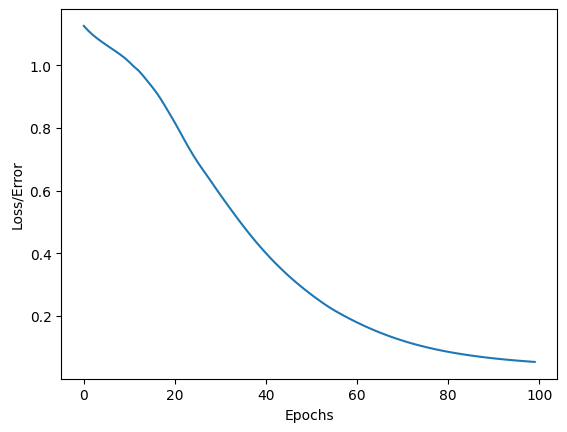

In [25]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epochs')

In [24]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error